In [48]:
from alpaca import ALPcouplings
import numpy as np
import matplotlib.pyplot as plt

from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca.plotting.mpl import exclusionplot
from alpaca.sectors import default_sectors

plt.rcParams.update({'font.size': 16, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [11]:
from alpaca.models import QED_DFSZ

tanbeta = np.logspace(-1, 1, 50)
fa= np.logspace(5, 8, 50)
FA, TANBETA = np.meshgrid(fa, tanbeta)
# Flatten the meshgrid arrays
Fa_flat = FA.flatten()
Tanbeta_flat = TANBETA.flatten()
couplings = []

for i, j in zip(Fa_flat, Tanbeta_flat):
    couplings.append(QED_DFSZ.get_couplings({'beta': np.arctan(j)}, i).match_run(5.5, 'VA_below', 'leadinglog', matching_scale=80))

couplings_QEDDFSZ = np.array(couplings).reshape(FA.shape)

magrid_QEDDFSZ=np.full(FA.shape, 2)
ma2grid_QEDDFSZ=np.full(FA.shape, 0.2)


In [12]:
vEW=246
def charges_3HDM(m, n, vd, vu):
    Xu=(m*vd**2-n*(vd**2-vEW**2+vu**2))/vEW**2
    Xd=((m-n)*(vd**2-vEW**2)-n*vu**2)/vEW**2
    Xe=(m*vd**2-n*(vd**2+vu**2))/vEW**2
    cg=-m
    cB=m+3*n
    return Xu, Xd, Xe, cg, cB

#Scan of points
vu=np.logspace(np.log10(19.35),np.log10(246),50)
vd=np.logspace(np.log10(0.47266),np.log10(246),50)

VU, VD=np.meshgrid(vu, vd)
#Calculate the charges
Xu, Xd, Xe, cg, cB = charges_3HDM(-2,1, VD, VU)

Xu_flatte= Xu.flatten()
Xd_flatte= Xd.flatten()
Xe_flatte= Xe.flatten()

Xu2, Xd2, Xe2, cg2, cB2 = charges_3HDM(2,1, VD, VU)

Xu2_flatte= Xu2.flatten()
Xd2_flatte= Xd2.flatten()
Xe2_flatte= Xe2.flatten()
# Create a list to store the ALPcouplings objects
couplings_list1 = []
couplings_list2 = []
couplings_list3 = []
couplings_list4 = []

ma_val1=0.2
ma_val2=2
fa_val1=5e6
fa_val2=1e6



In [13]:
for i, j, k, i2, j2, k2 in zip(Xu_flatte, Xd_flatte, Xe_flatte, Xu2_flatte, Xd2_flatte, Xe2_flatte):
    couplings1 = ALPcouplings({'cuR': i, 'cdR': j, 'ceR': k, 'cg':cg,'cB':cB}, scale=fa_val1, basis='derivative_above')
    couplings_list1.append(couplings1.match_run(ma_val1, 'VA_below', 'leadinglog'))
    couplings2 = ALPcouplings({'cuR': i, 'cdR': j, 'ceR': k, 'cg':cg,'cB':cB}, scale=fa_val2, basis='derivative_above')
    couplings_list2.append(couplings2.match_run(ma_val2, 'VA_below', 'leadinglog'))
    couplings3= ALPcouplings({'cuR': i2, 'cdR': j2, 'ceR': k2, 'cg':cg2,'cB':cB2}, scale=fa_val1, basis='derivative_above')
    couplings_list3.append(couplings3.match_run(ma_val1, 'VA_below', 'leadinglog'))
    couplings4= ALPcouplings({'cuR': i2, 'cdR': j2, 'ceR': k2, 'cg':cg2,'cB':cB2}, scale=fa_val2, basis='derivative_above')
    couplings_list4.append(couplings4.match_run(ma_val2, 'VA_below', 'leadinglog'))
    
    


In [14]:
# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_3HDM1= np.array(couplings_list1).reshape(Xu.shape)
couplings_3HDM2 = np.array(couplings_list2).reshape(Xu.shape)
couplings_3HDM3 = np.array(couplings_list3).reshape(Xu2.shape)
couplings_3HDM4 = np.array(couplings_list4).reshape(Xu2.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid_3HDM1 = np.full(Xu.shape, fa_val1)
ma_grid_3HDM1 = np.full(Xu.shape, ma_val1)

ma_grid_3HDM2 = np.full(Xu.shape, ma_val2)
fa_grid_3HDM2 = np.full(Xu.shape, fa_val2)

ma_grid_3HDM3 = np.full(Xu2.shape, ma_val1)
fa_grid_3HDM3 = np.full(Xu2.shape, fa_val1)

ma_grid_3HDM4 = np.full(Xu2.shape, ma_val2)
fa_grid_3HDM4 = np.full(Xu2.shape, fa_val2)


In [15]:
chi2_belle3HDM1 = get_chi2(default_sectors['all'], ma_grid_3HDM1, couplings_3HDM1, fa_grid_3HDM1, integrator='no_rge', min_probability=0)
chi2_belle3HDM2 = get_chi2(default_sectors['all'], ma_grid_3HDM2, couplings_3HDM2, fa_grid_3HDM2, integrator='no_rge', min_probability=0)
chi2_belle3HDM3 = get_chi2(default_sectors['all'], ma_grid_3HDM3, couplings_3HDM3, fa_grid_3HDM3, integrator='no_rge', min_probability=0)
chi2_belle3HDM4 = get_chi2(default_sectors['all'], ma_grid_3HDM4, couplings_3HDM4, fa_grid_3HDM4, integrator='no_rge', min_probability=0)

In [34]:
chi2_QEDDFSZ = get_chi2(default_sectors['all'], magrid_QEDDFSZ, couplings_QEDDFSZ, FA, integrator='no_rge', min_probability=0)

In [35]:
chi2_QEDDFSZ2 = get_chi2(default_sectors['all'], ma2grid_QEDDFSZ, couplings_QEDDFSZ, FA, integrator='no_rge', min_probability=0)

In [50]:
chi2_meas_QEDDFSZ=chi2_QEDDFSZ[0].split_measurements()
chi2_meas_QEDDFSZ2=chi2_QEDDFSZ2[0].split_measurements()
for c in chi2_meas_QEDDFSZ:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
for c in chi2_meas_QEDDFSZ2:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)

chi2_meas_3HDM1=chi2_belle3HDM1[0].split_measurements()
chi2_meas_3HDM2=chi2_belle3HDM2[0].split_measurements()
chi2_meas_3HDM3=chi2_belle3HDM3[0].split_measurements()
chi2_meas_3HDM4=chi2_belle3HDM4[0].split_measurements()


for c in chi2_meas_3HDM1:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
        
  
        
for c in chi2_meas_3HDM2:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)

for c in chi2_meas_3HDM3:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)
for c in chi2_meas_3HDM4:
    if c.sector.name == 'K+ -> alp pion+ @ NA62':
        c.set_plot_style(color="#821e99",lw=2)
    if c.sector.name == 'B0 -> K*0 muon muon @ LHCb':
        c.set_plot_style(color="#3650c4",lw=2)
    elif c.sector.name == 'B+ -> K+ alp @ Belle II':
        c.set_plot_style(color="#0D5B11",lw=2)
    elif c.sector.name == 'K+ -> electron electron pion+ @ MicroBooNE':
        c.set_plot_style(color="#c6f312",lw=2)
    elif c.sector.name == 'B0 -> K*0 muon muon @ Belle II':
        c.set_plot_style(color="#08e0d9",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ Belle II':
        c.set_plot_style(color="#e74c3c",lw=2)
    elif c.sector.name == 'B+ -> K+ muon muon @ LHCb':
        c.set_plot_style(color="#e73cd9ff",lw=2)

# chi2_only_belle3HDM1=[]
# for c in chi2_meas_3HDM1:
#     if c.sector.name == 'B+ -> K+ alp @ Belle II':
#         chi2_only_belle3HDM = [c]
count=0
for c in chi2_meas_3HDM1:
    print(count,c.sector.name)
    count+=1

0 B0 -> muon muon @ CMS
1 B0 -> K*0 muon tau @ LHCb
2 B0 -> muon muon @ LHCb
3 D0 -> muon muon @ LHCb
4 B+ -> muon muon pion+ @ BaBar
5 B+ -> K+ muon muon @ LHCb
6 D0 -> electron electron @ Belle
7 tau -> electron electron electron @ Belle
8 Upsilon(1S) -> charm charm photon @ BaBar
9 KS -> photon photon @ NA48
10 J/psi -> muon muon photon @ BESIII
11 Ds+ @ PDG
12 D+ -> electron electron pion+ @ LHCb
13 K0L @ PDG
14 delta_mK0 @ PDG
15 B+ -> K+ muon tau @ BaBar
16 J/psi -> alp photon @ BESIII
17 Ds+ -> K+ muon muon @ LHCb
18 B0 -> K0 pion+ pion- pion0 @ Belle
19 B+ -> K+ muon muon @ CHARM
20 D0 -> electron eta muon @ BaBar
21 B+ -> muon muon pion+ @ Belle
22 tau -> alp muon @ Belle II
23 tau -> electron photon photon @ BaBar
24 muon -> electron photon photon @ Cristal Box
25 D0 -> electron electron eta @ BESIII
26 B0 -> K*0 muon muon @ Belle II
27 B0 -> tau tau @ LHCb
28 B+ -> K+ alp @ BaBar
29 B+ -> K+ tau tau @ BaBar
30 Upsilon(3S) -> alp photon @ BaBar
31 D+ @ PDG
32 K+ -> electron m

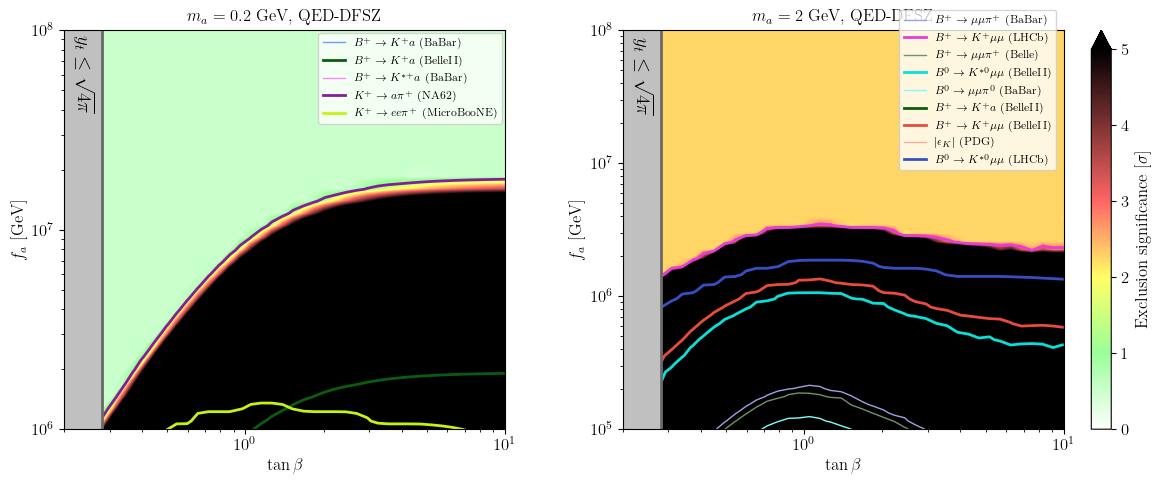

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False)
ax1=exclusionplot(TANBETA, FA, chi2_meas_QEDDFSZ, r'$\tan\beta$', r'$ f_a$ [GeV]', rf'$m_a={ma_val2}$ GeV, QED-DFSZ', ax=ax[1])
ax2=exclusionplot(TANBETA, FA, chi2_meas_QEDDFSZ2, r'$\tan\beta$', r'$f_a$ [GeV]', rf'$m_a={ma_val1}$ GeV, QED-DFSZ', ax=ax[0])

ax1.get_legend().set_bbox_to_anchor((0.4, 0.85))
ax2.get_legend().set_bbox_to_anchor((0.35, 0.88))


ax1.fill_between([0.1, 0.28], 1e5, 1e8, color='silver', alpha=1, label=r'$y_t\leq \sqrt{4\pi}$', zorder=2)
ax2.fill_between([0.1, 0.28], 1e5, 1e8, color='silver', alpha=1, label=r'$y_t\leq \sqrt{4\pi}$', zorder=2)
ax1.vlines(0.28, 1e5, 1e8, color='dimgray', linewidth=2,zorder=2)
ax2.vlines(0.28, 1e5, 1e8, color='dimgray', linewidth=2,zorder=2)
ax1.set_xlim(0.2, 10)
ax2.set_xlim(0.2, 10)
ax1.set_ylim(1e5, 1e8)
ax2.set_ylim(1e6, 1e8)
ax1.text(0.24, 4.5e7, r'$y_t\leq \sqrt{4\pi}$', fontsize=14, color='black', rotation=-90, va='center', ha='center')
ax2.text(0.24, 6e7, r'$y_t\leq \sqrt{4\pi}$', fontsize=14, color='black', rotation=-90, va='center', ha='center')
# fig.axes[2].set_visible(False)
fig.axes[3].set_visible(False)

fig.tight_layout()
fig.tight_layout()
fig.savefig('QED_DFSZ_exclusion2.pdf', bbox_inches='tight')

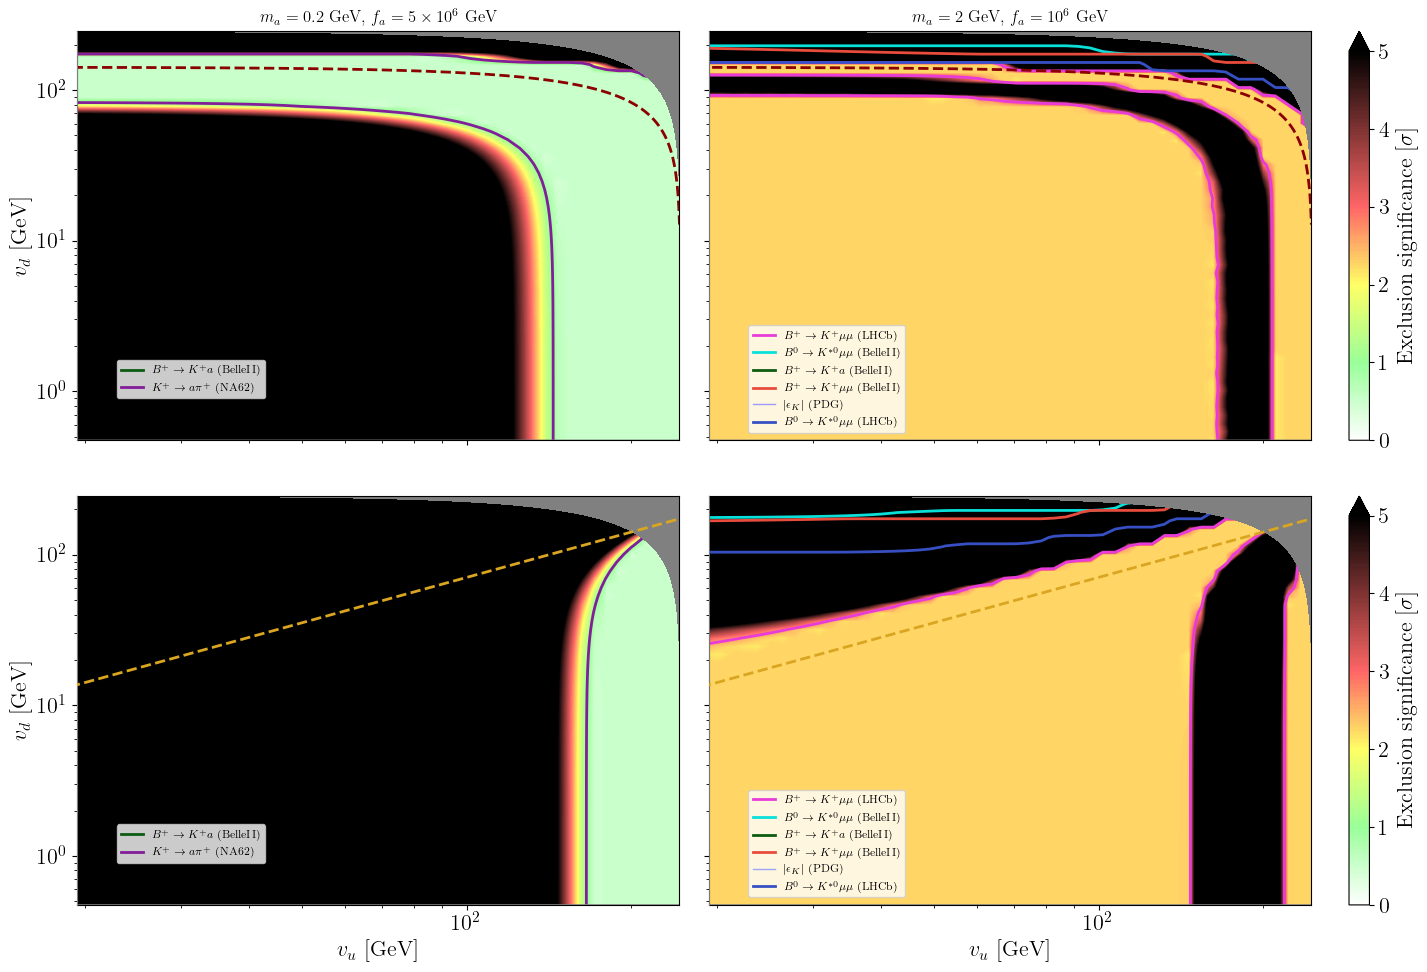

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)

ax1=exclusionplot(vu, vd, chi2_meas_3HDM1, r' ', r'$v_d$ [GeV]', rf'$m_a=0.2$ GeV, $f_a=5\times 10^{6}$ GeV',    ax=ax[0, 0])
ax2=exclusionplot(vu, vd, chi2_meas_3HDM2, r' ', r' ', rf'$m_a=2$ GeV, $f_a= 10^{6}$ GeV', ax=ax[0, 1])
ax3=exclusionplot(vu, vd, chi2_meas_3HDM3, r'$v_u$ [GeV]', r'$v_d$ [GeV]', rf' ', ax=ax[1, 0])
ax4=exclusionplot(vu, vd, chi2_meas_3HDM4, r'$v_u$ [GeV]', r' ', rf' ', ax=ax[1, 1])
vu_aux=np.linspace(1, 245, 1000)
vd_aux=np.linspace(0.1, 246, 1000)
vu_aux_grid, vd_aux_grid = np.meshgrid(vu_aux, vd_aux)
for j in ax:
    for i in j:
        i.fill_between(vu_aux, 0.0,0.47266, color='gray', alpha=1, zorder=3)
        i.fill_betweenx(vd_aux, 0.1,19.35, color='gray', alpha=1, zorder=3)
        i.contourf(vu_aux_grid, vd_aux_grid, np.sqrt(vd_aux_grid**2 + vu_aux_grid**2), levels=[246,500], colors='gray', zorder=2)
        i.set_xlim(19.35,  245)
        i.set_ylim(0.47266, 245)

ax1.plot(vu_aux, np.sqrt((vEW**2-vu_aux**2)/(3)), color='darkred', linestyle='--', linewidth=2,label=r'$v_d=\sqrt{2(v_{EW}^2-v_u^2)/(1)}$', zorder=2)
ax2.plot(vu_aux, np.sqrt((vEW**2-vu_aux**2)/(3)), color='darkred', linestyle='--', linewidth=2, label=r'$v_d=\sqrt{2(v_{EW}^2-v_u^2)/(1)}$', zorder=3)

ax3.plot(vu_aux, vu_aux/np.sqrt(2), color='goldenrod', linestyle='--', linewidth=2, label=r'$v_d=v_u/3$', zorder=5)
ax4.plot(vu_aux, vu_aux/np.sqrt(2), color='goldenrod', linestyle='--', linewidth=2, label=r'$v_d=v_u/3$', zorder=5)


ax1.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax2.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax3.get_legend().set_bbox_to_anchor((-0.1, 0.15))
ax4.get_legend().set_bbox_to_anchor((-0.1, 0.15))

fig.axes[4].set_visible(False)
fig.axes[6].set_visible(False)
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

fig.savefig('3HDM_exclusion2.pdf', bbox_inches='tight')

In [292]:
from alpaca.common import kallen
from alpaca.constants import mB, mK, hbarc_GeVnm
from scipy.integrate import quad_vec

def decay_probability_BelleII(decay_type: str, ctau: float | None = None, ma: float | None = None, theta: float | None = None, br_dark = 0) -> float:
    rmin = 0.1
    rmax = 100
    lab_boost = 0.28
    mass_parent = mB
    mass_sibling = mK
    if decay_type == 'flat':
        return 1
    kallen_M = kallen(mass_parent**2, ma**2, mass_sibling**2)
    kallen_M = np.where(kallen_M >0, kallen_M, np.nan)
    pa_parent = np.sqrt(kallen_M)/(2*mass_parent)
    if lab_boost == 0:
        pa_lab = pa_parent
    else:
        Ea_parent = (mass_parent**2 + ma**2 - mass_sibling**2)/(2*mass_parent)
        lab_gamma = np.sqrt(1 + lab_boost**2)
        pa = lambda th: np.sqrt((lab_boost * Ea_parent + lab_gamma * pa_parent * np.cos(th))**2 + (pa_parent * np.sin(th))**2)
        if theta is None:
            pa_lab = quad_vec(pa, 0, np.pi)[0]/np.pi
        else:
            pa_lab = pa(theta)
    betagamma = pa_lab/ma
    underflow_error = np.geterr()['under']
    np.seterr(under='ignore')
    if decay_type == 'prompt':
        result = 1 - np.exp(-rmin/ctau/betagamma)
    elif decay_type == 'displaced':
        result = np.exp(-rmin/ctau/betagamma) - np.exp(-rmax/ctau/betagamma)
    elif decay_type == 'invisible':
        br_dark = np.atleast_1d(br_dark)
        prob = np.exp(-rmax/ctau/betagamma)
        result = prob + (1 - prob)*br_dark
    np.seterr(under=underflow_error)
    return result

In [295]:
import alpaca
dws_3HDM = alpaca.branching_ratio('a -> hadrons', ma_val, couplings_3HDM, 1e6, integrator='no_rge')

/var/folders/d6/3slwsgbn0nxcb5gx6gqqrsym0000gn/T/ipykernel_83770/3562442076.py:6: UserWarning: linewidths is ignored by contourf
  cs=plt.contourf(vu, vd, dws_3HDM, norm=LogNorm(), levels=np.logspace(-8, 0, 20), cmap='viridis', linewidths=1, linestyles='solid', zorder=1)


Text(0, 0.5, '$v_d$ [GeV]')

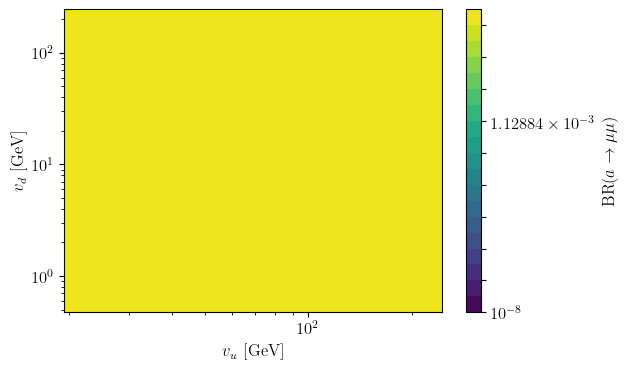

In [296]:

from matplotlib.colors import LogNorm

ctau_3HDM = hbarc_GeVnm/dws_3HDM/1e9
probs = np.stack([decay_probability_BelleII('prompt', ctau_3HDM*100, 2), decay_probability_BelleII('displaced', ctau_3HDM*100, 2), decay_probability_BelleII('invisible', ctau_3HDM*100, 2)], axis=-1)
plt.figure(figsize=(15.5/2.54, 10/2.54))
cs=plt.contourf(vu, vd, dws_3HDM, norm=LogNorm(), levels=np.logspace(-8, 0, 20), cmap='viridis', linewidths=1, linestyles='solid', zorder=1)
plt.colorbar(cs, label=r'$\mathrm{BR}(a \to \mu\mu)$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$v_u$ [GeV]')
plt.ylabel(r'$v_d$ [GeV]')

In [297]:
dws_3HDM

array([[0.9838447 , 0.9854942 , 0.98540168, 0.98935712, 0.99292621,
        0.99699869, 0.99607958, 0.98350351, 0.95228795, 0.91332533],
       [0.98313561, 0.98628624, 0.98554827, 0.98851577, 0.99282447,
        0.996242  , 0.99595939, 0.98283467, 0.95266824, 0.91410047],
       [0.98431528, 0.98500317, 0.98753453, 0.9897659 , 0.99311095,
        0.99678574, 0.99574584, 0.98329718, 0.95240393, 0.91375127],
       [0.98426481, 0.98584308, 0.98627609, 0.98944219, 0.99236309,
        0.99671007, 0.99600467, 0.98294336, 0.95330585, 0.91514571],
       [0.98244083, 0.98495536, 0.98704485, 0.98881454, 0.99259965,
        0.99665858, 0.99610089, 0.98338123, 0.95124655, 0.91411735],
       [0.98278902, 0.98535845, 0.98595305, 0.98882788, 0.99267562,
        0.99669418, 0.99621153, 0.98349605, 0.95277218, 0.91334274],
       [0.97976582, 0.98011562, 0.98289089, 0.98636671, 0.9903281 ,
        0.99587514, 0.99664868, 0.9838595 , 0.95477755, 0.91562965],
       [0.96301772, 0.96670132, 0.9697250

In [ ]:
ctau_3HDM = hbarc_GeVnm/np.array(dws_3HDM)/1e9

plt.figure(figsize=(15.5/2.54, 10/2.54))

plt.pcolormesh(x_ma, y_ctau, probs/2, alpha=0.3, antialiased=True)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.loglog(ma, ctau_3HDM, label='QED-DFSZ', c='orangered', lw=1.5)


plt.text(2e-2, 1e-8, 'Prompt', color='r')
plt.text(2e-2, 1e-4, 'Displaced', color='g')
plt.text(2e-2, 1e-1, 'Invisible', color='b')

plt.xlim(1e-2, mB-mK)

plt.legend(fontsize=10, ncols=2, loc='upper right')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c\tau_a$ [m]')
plt.title(r'$B\to K a$ at Belle II, $f_a = 10$ TeV, $\Lambda=4\pi f_a$', fontsize=12)
plt.tight_layout()
plt.savefig('ctau_BK.pdf', dpi=500)

Text(0, 0.5, '$\\mathrm{BR}(B^+ \\to K^+ a)$')

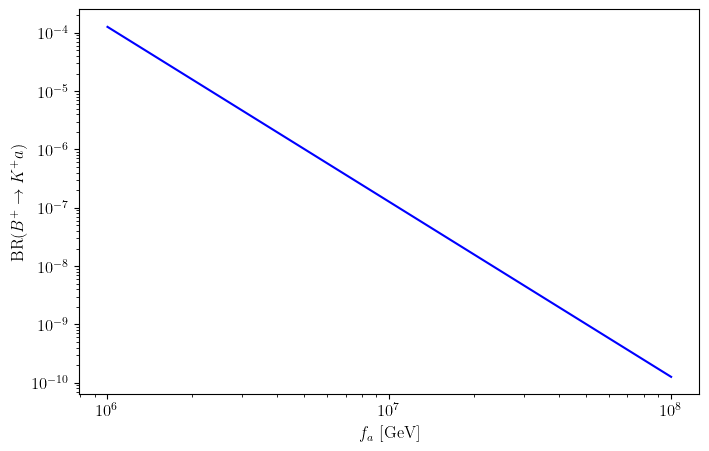

In [ ]:
import alpaca
fa_vecs=np.logspace(5, 8, 50)
plt.figure(figsize=(8, 5))
plt.plot(fa, [np.max(alpaca.branching_ratio('B+ -> K+ a', 2.0, couplings_3HDM, ii))for ii in fa_vecs], label=r'$m_a=2$ GeV', color='blue')
# plt.xlim(1e6, 1e8)
# plt.ylim(1e-10, 1e-5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$f_a$ [GeV]')
plt.ylabel(r'$\mathrm{BR}(B^+ \to K^+ a)$')

Text(0, 0.5, '$v_d$ [GeV]')

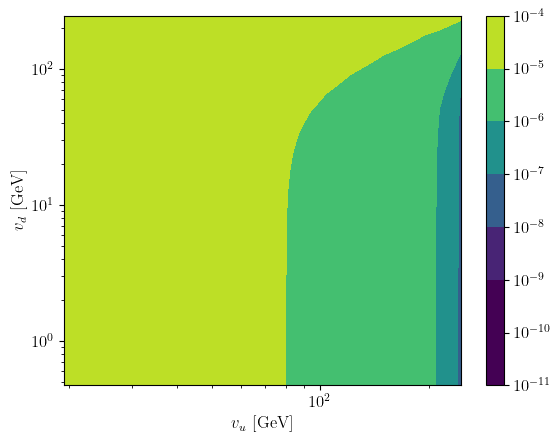

In [155]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()
cs = ax.contourf(
	vu, vd,
	abs(alpaca.branching_ratio('B+ -> K+ a', 2.0, couplings_3HDM, 1.38e5)),
	cmap='viridis', norm=LogNorm(vmin=1e-9, vmax=1e-4)
)
plt.colorbar(cs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$v_u$ [GeV]')
ax.set_ylabel(r'$v_d$ [GeV]')
